In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data1=pd.read_csv("C:\\Users\\advay\\Downloads\\Assignment 5\\50_Startups.csv")

In [3]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
data1.shape

(50, 5)

In [42]:
data1.max()

Rnds              165349.20
Administration    182645.56
MS                471784.10
State                  2.00
Profit            192261.83
dtype: float64

In [43]:
data1.min()

Rnds                  0.00
Administration    51283.14
MS                    0.00
State                 0.00
Profit            14681.40
dtype: float64

In [4]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [20]:
le=LabelEncoder()
data1.iloc[:,3]=le.fit_transform(data1.iloc[:,3])

In [7]:
data1.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
data1.rename(columns={'R&D Spend':'Rnds','Marketing Spend':'MS',},inplace=True)

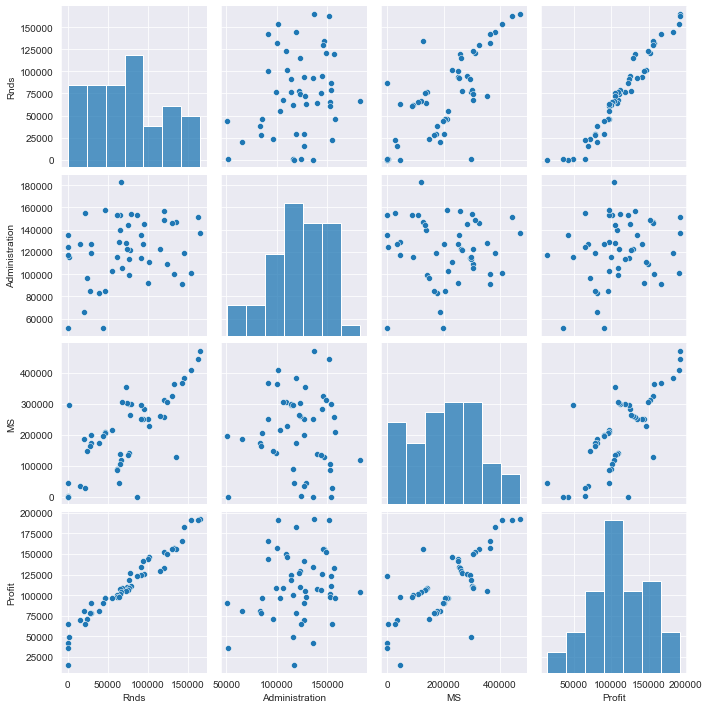

In [9]:
#to get overview of data
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [21]:
#building the model
model=smf.ols('Profit~Rnds+MS+Administration+State',data=data1).fit()

In [22]:
model.params

Intercept         50142.506443
Rnds                  0.805760
MS                    0.027228
Administration       -0.026826
State               -22.320577
dtype: float64

In [23]:
print(model.tvalues,'/n',model.pvalues)

Intercept          7.368962
Rnds              17.608621
MS                 1.636966
Administration    -0.519906
State             -0.013865
dtype: float64 /n Intercept         2.900008e-09
Rnds              8.249206e-22
MS                1.086131e-01
Administration    6.056771e-01
State             9.889988e-01
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
#as we can see that Administration, State and MS p-value is greater than 0.05 so it is insignificant
#So we try to optimize the data by doing simple regression with Profit
md_Administration=smf.ols('Profit~Administration',data=data1).fit()
#t and pvalues for the data
print(md_Administration.tvalues,'/n',md_Administration.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 /n Intercept         0.003824
Administration    0.162217
dtype: float64


In [24]:
md_State=smf.ols('Profit~State',data=data1).fit()
print (md_State.tvalues,'/n',md_State.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 /n Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [25]:
md_MS=smf.ols('Profit~MS',data=data1).fit()
print (md_MS.tvalues,'/n',md_MS.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 /n Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [26]:
md_ASM=smf.ols('Profit~State+Administration+MS',data=data1).fit()
print (md_ASM.tvalues,'/n',md_ASM.pvalues)

Intercept         1.018612
State             0.441897
Administration    2.439947
MS                8.150255
dtype: float64 /n Intercept         3.137147e-01
State             6.606341e-01
Administration    1.860240e-02
MS                1.777616e-10
dtype: float64


In [30]:
#Calculating VIF
rsq_Administration=smf.ols('Administration~State+MS+Rnds',data=data1).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_State=smf.ols('State~Administration+MS+Rnds',data=data1).fit().rsquared
vif_State=1/(1-rsq_State)

rsq_MS=smf.ols('MS~Administration+Rnds+State',data=data1).fit().rsquared
vif_MS=1/(1-rsq_MS)

rsq_Rnds=smf.ols('Rnds~State+MS+Administration',data=data1).fit().rsquared
vif_Rnds=1/(1-rsq_Rnds)

#Storing VIF values in a dataframe
d1={'Variables':['Administration','MS','State','Rnds'],'Rsq':[rsq_Administration,rsq_MS,rsq_State,rsq_Rnds],'VIF':[vif_Administration,vif_MS,vif_State,vif_Rnds]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Rsq,VIF
0,Administration,0.149165,1.175315
1,MS,0.570222,2.326780
2,State,0.011155,1.011281
3,Rnds,0.596966,2.481178


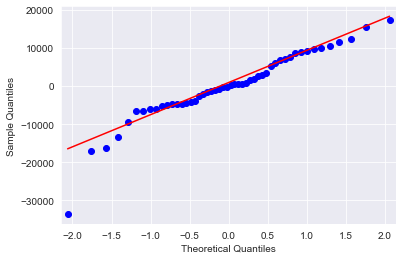

In [32]:
#As the VIF Values as are not Dramatic we move forward without removing the regressors in the model
#Residual Analysis
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title=("Q-Q Plot OF Residuals")
plt.show()

In [33]:
#As most of the points lie on the line we move forward 
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

TypeError: 'str' object is not callable

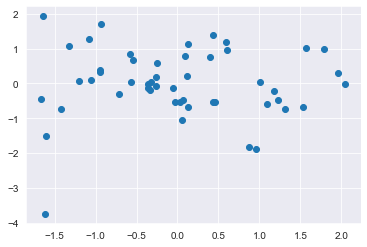

In [34]:
#Residual plot for homoscedasitcity-to ensure that the variance between each data point is same 
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlable('Standardized Fitted Values')
plt.ytable('Standardized Residual Values')
plt.show()

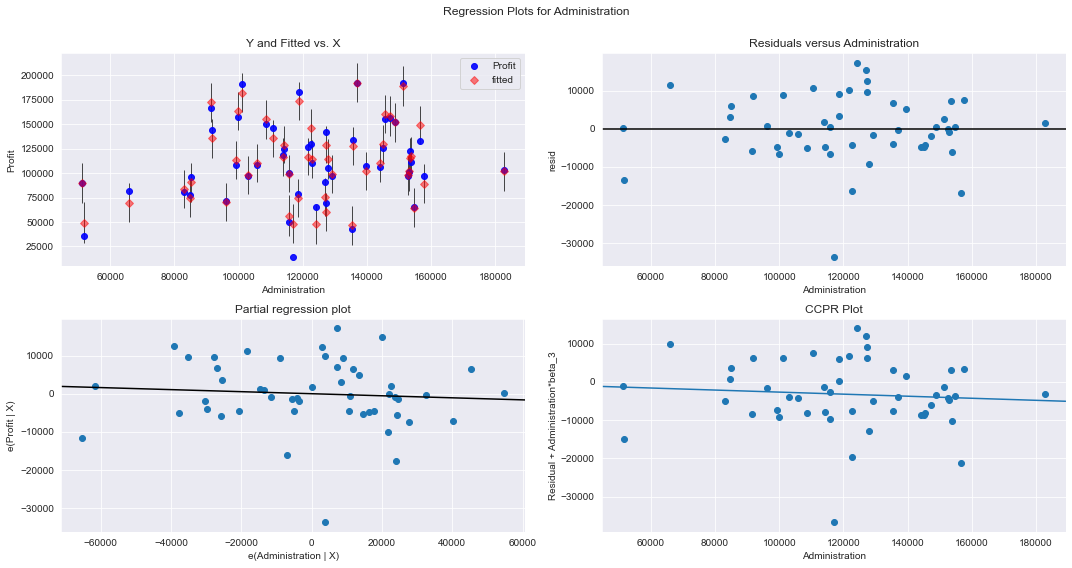

In [36]:
#Residual Vs Regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

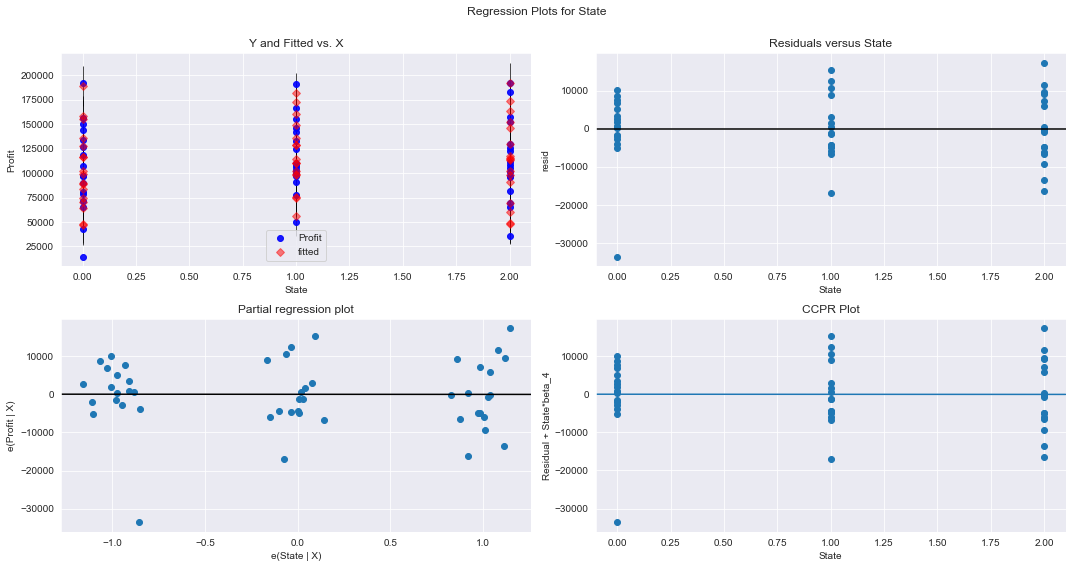

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"State",fig=fig)
plt.show()

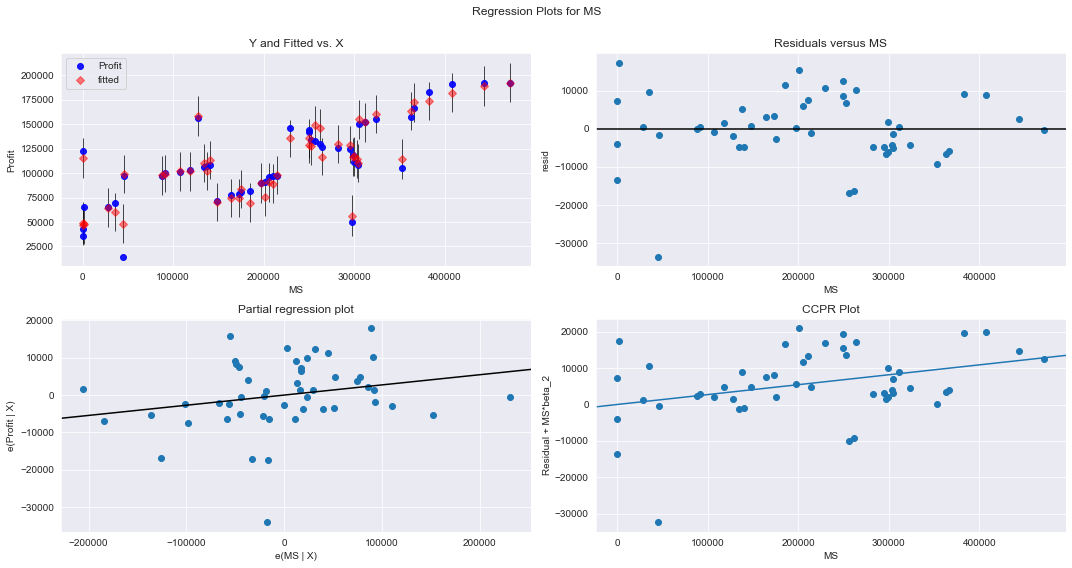

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

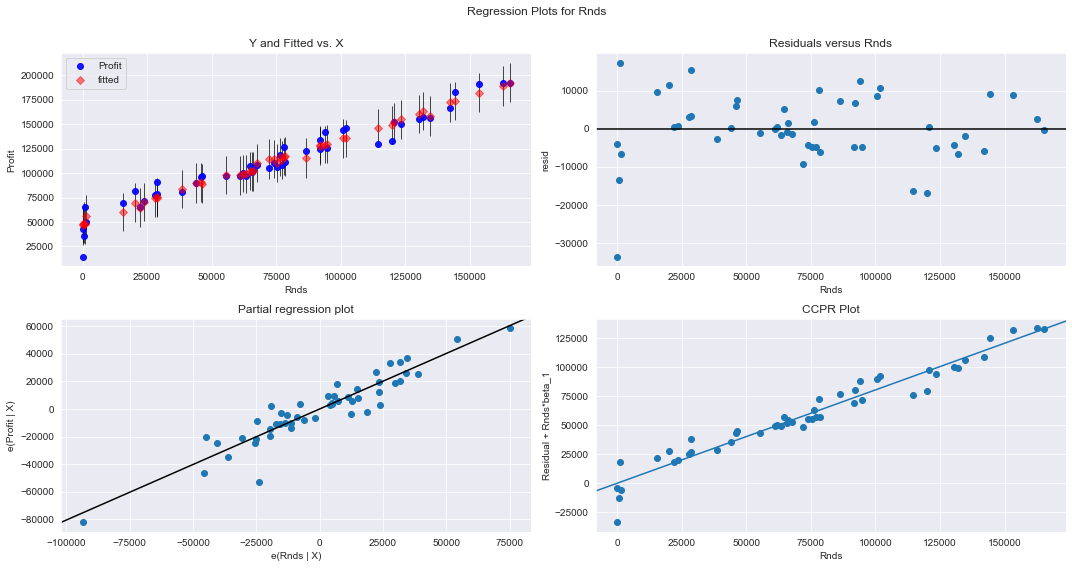

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Rnds",fig=fig)
plt.show()

In [40]:
#Building the final model after the analysis
model=smf.ols('Profit~Rnds+MS+Administration+State',data=data1).fit()


In [49]:
new_data=pd.DataFrame({'Rnds':[200000,250000,300000,350000,400000],'MS':[500000,600000,700000,800000,1000000],'Administration':[200000,250000,300000,350000,400000],'State':[0,2,1,1,2]})

In [50]:
new_data

,Rnds,MS,Administration,State
0,200000,500000,200000,0
1,250000,600000,250000,2
2,300000,700000,300000,1
3,350000,800000,350000,1
4,400000,1000000,400000,2


In [51]:
model.predict(new_data)

0    219543.105875
1    261167.922848
2    302859.701553
3    344529.159681
4    388899.064152
dtype: float64